In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
def get_valid_neighbors(row, col, H, W, segmented):
        valid_growth = []
        # North
        if (row > 0) and (not segmented[row - 1, col]):
            valid_growth.append([row - 1, col])
        # East
        if (col < W-1) and (not segmented[row, col + 1]):
            valid_growth.append([row, col + 1])
        # South
        if (row < H-1) and (not segmented[row + 1, col]):
            valid_growth.append([row + 1, col])
        # West
        if (col > 0) and (not segmented[row, col - 1]):
            valid_growth.append([row, col - 1])
            
        # North-East
        if (row > 0 and col < W-1) and (not segmented[row - 1, col + 1]):
            valid_growth.append([row - 1, col + 1])
        # South-East
        if (row < H-1 and col < W-1) and (not segmented[row + 1, col + 1]):
            valid_growth.append([row + 1, col + 1])
        # South-West
        if (row < H-1 and col > 0) and (not segmented[row + 1, col - 1]):
            valid_growth.append([row + 1, col - 1])     
        # North-West
        if (row > 0 and col > 0) and (not segmented[row - 1, col - 1]):
            valid_growth.append([row - 1, col - 1])
                                
        return valid_growth

In [3]:
def itterativ_growing(seed, segmented, T, im):
    inital_value = im[seed[0], seed[1]]
    checked_candidates = np.zeros_like(im).astype(bool)
    H, W = im.shape
    valid_growth = get_valid_neighbors(seed[0], seed[1], H, W, segmented)
    while len(valid_growth) > 0:
        next_valid_growth = []
        for row, col in valid_growth:
            # mean = np.mean(im[segmented])
            mean = inital_value
            if np.absolute(im[row, col] - mean) < T:
                segmented[row, col] = True
                next_valid_growth.extend(get_valid_neighbors(row, col, H, W, segmented))
        set_lst = set(tuple(element) for element in next_valid_growth)
        valid_growth = [list(t) for t in set(tuple(element) for element in set_lst)]
    return segmented

In [4]:
def region_growing(im: np.ndarray, seed_points: list, T: int) -> np.ndarray:
    """
        A region growing algorithm that segments an image into 1 or 0 (True or False).
        Finds candidate pixels with a Moore-neighborhood (8-connectedness). 
        Uses pixel intensity thresholding with the threshold T as the homogeneity criteria.
        The function takes in a grayscale image and outputs a boolean image

        args:
            im: np.ndarray of shape (H, W) in the range [0, 255] (dtype=np.uint8)
            seed_points: list of list containing seed points (row, col). Ex:
                [[row1, col1], [row2, col2], ...]
            T: integer value defining the threshold to used for the homogeneity criteria.
        return:
            (np.ndarray) of shape (H, W). dtype=np.bool
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    # You can also define other helper functions
    total_segmented = np.zeros_like(im).astype(bool)
    im = im.astype(float)
    H, W = im.shape
    for row, col in seed_points:
        segmented = np.zeros_like(im).astype(bool)
        segmented[row, col] = True
        segmented = itterativ_growing([row, col], segmented, T, im)
        total_segmented = total_segmented | segmented
    return total_segmented
    ### END YOUR CODE HERE ###

Reading image: images\defective-weld.png
Next Seed
255.0
Next Seed
255.0
Next Seed
255.0
Next Seed
255.0
Saving image to: image_processed\defective-weld-segmented.png


C:\Studie\NTNU\Visuell Databehandling\IP\TDT4195-StarterCode\assignment3\utils.py:55: UserWarning: image_processed\defective-weld-segmented.png is a low contrast image
  skimage.io.imsave(impath, im)


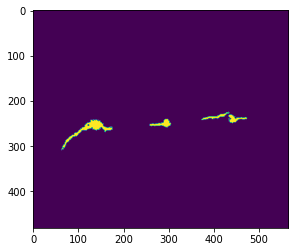

In [5]:
if __name__ == "__main__":
    # DO NOT CHANGE
    im = utils.read_image("defective-weld.png")

    seed_points = [ # (row, column)
        [254, 138], # Seed point 1
        [253, 296], # Seed point 2
        [233, 436], # Seed point 3
        [232, 417], # Seed point 4
    ]
    intensity_threshold = 50
    segmented_image = region_growing(im, seed_points, intensity_threshold)

    assert im.shape == segmented_image.shape, "Expected image shape ({}) to be same as thresholded image shape ({})".format(
        im.shape, segmented_image.shape)
    assert segmented_image.dtype == np.bool, "Expected thresholded image dtype to be np.bool. Was: {}".format(
            segmented_image.dtype)

    segmented_image = utils.to_uint8(segmented_image)
    utils.save_im("defective-weld-segmented.png", segmented_image)
    
    
    plt.imshow(segmented_image)